The Hyperloglog implementation was acquired by using pip install hll and can be found at http://github.com/ascv/HyperLogLog . It was implemented in C and is faster than the other one. 

In [7]:
import time 
from HLL import HyperLogLog
from random import randint 
import matplotlib 
from matplotlib import pyplot as plt 
import numpy as np 
import math 
%matplotlib inline

The following is a class defined to allow someone to do trials on the distribution of error for hyperloglog sizing. As of now, the add_trial() function allows the user to add a trial in which some number x of strings (right now the strings are made from python-generated random integers) are put into a hyperloglog with 2^n registers. The defaults are n = 16 (the maximum) and x = 1000000. The methods plot_trials() plots a histogram of the cardinality estimations and plot_timeframes() plots a histogram of the time to get the cardinality of the HyperLogLog in seconds

In [2]:
class Trials: 
    def __init__(self): 
        self.trials = []
    def refresh(self): 
        self.trials = [] 
    def add_trial(self, n=16, x = 1000000):
        hll = HyperLogLog(n, seed = 314)
        for i in range(x):
            hll.add(str(randint(10, 999999)))
        start_time = time.time()
        card = hll.cardinality()
        timex = time.time()- start_time
        self.trials.append((timex, card))
    def plot_trials(self): 
        n, bins, patches = plt.hist([x[1] for x in self.trials])
    def plot_timeframes(self):
        n, bins, patches = plt.hist([x[0] for x in self.trials])
    def __repr__(self): 
        return str(self.trials)
        

In [3]:
test = Trials()

In [4]:
for i in range(100):
    test.add_trial()

The following indicates that perhaps using random integers was not the best way to go as there probably were repeats. If you choose to pull this code you may change the strings that are added. If I have time and I'm bored, I'll put in the word list from Othello or Macbeth or something. 

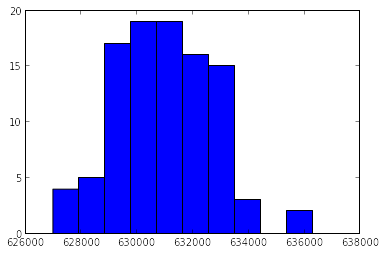

In [5]:
test.plot_trials()

At the very least it's very fast. For point of reference it's about an order of magnitude faster than the python dictionary. See README.md

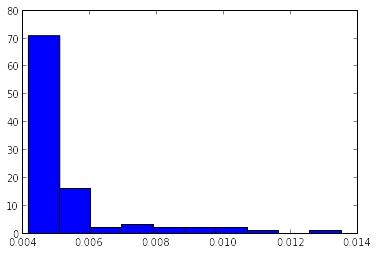

In [6]:
test.plot_timeframes()

In [9]:
## other stuff 
trials = []
for j in range(100):
    d = {} 
    for i in range (1000000):
        d[i] = 1
    start_time = time.time()
    d[i+1] =1
    timex = time.time() - start_time
    trials.append(timex)
np_trials = np.array(trials)
print np.mean(np_trials), np.std(np_trials)

1.07097625732e-05 7.2808427921e-06
